In [1]:
import sys
sys.path.append('../..')
sys.path.append('../modules')

import warnings
def warn(message, category=None, stacklevel=1, source=None):
    pass

warnings.warn = warn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-paper')
from lifelines import KaplanMeierFitter
from diabetes_onset import survival_diabetes

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import lifelines
from lifelines import CoxPHFitter 
from lifelines import WeibullFitter
from lifelines.statistics import logrank_test
from lifelines.plotting import add_at_risk_counts, rmst_plot
from lifelines.utils import restricted_mean_survival_time

from diabetes_onset_plotter import survival_fit_res, make_results

In [2]:
# !aws s3 cp s3://cdphp-s3-us-e-p-pond/rpi/nneehal/DATA/odata/m6_propens_202108 ../temp/prop/ --recursive

In [3]:
p = '../temp/prop/'
treated = pd.read_pickle(p+'treated0_o.p').sort_values(by = ['PERS_ID', 'MYR']).reset_index(drop = True)
controls = pd.read_pickle(p+'match0_o.p').sort_values(by = ['PERS_ID', 'MYR']).reset_index(drop = True)

In [4]:
columns_to_match = ['AGE_AT_MIDMONTH', 'MBR_GNDR', 'ALLOW_AMT','CC_TOBACCO',  'CC_OBESITY',
                   'CC_HYPERTENSION', 'CC_HYPOTHYROID']

tr_desc0 = treated[columns_to_match].describe().loc[['mean', 'std']]
tr_desc0 = tr_desc0.T

con_desc0 = controls[columns_to_match].describe().loc[['mean', 'std']]
con_desc0 = con_desc0.T

alli = pd.concat((tr_desc0, con_desc0), axis = 1, keys = ['Treated','Matched Controls'])

alli

Treated            Matched Controls           
                      mean        std             mean        std
AGE_AT_MIDMONTH  50.662585  12.472982        52.706329  18.483366
MBR_GNDR          0.187962   0.390689         0.297835   0.457309
ALLOW_AMT         4.119446   2.794145         3.975453   2.859839
CC_TOBACCO        0.064695   0.245992         0.081464   0.273547
CC_OBESITY        0.491836   0.499943         0.333909   0.471610
CC_HYPERTENSION   0.321781   0.467168         0.311136   0.462960
CC_HYPOTHYROID    0.094886   0.293063         0.090162   0.286415

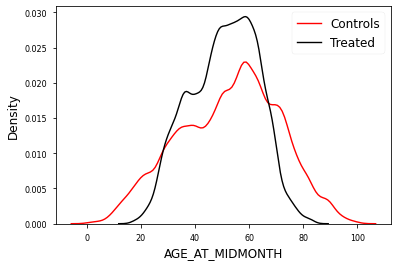

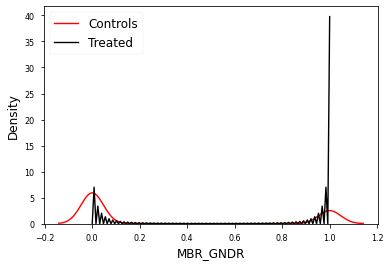

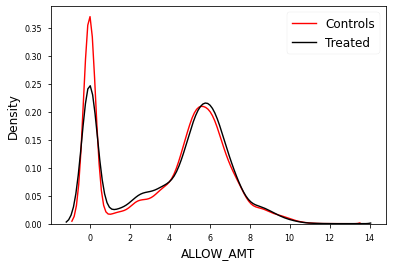

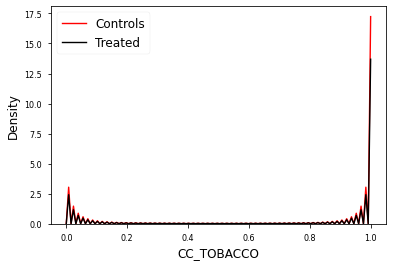

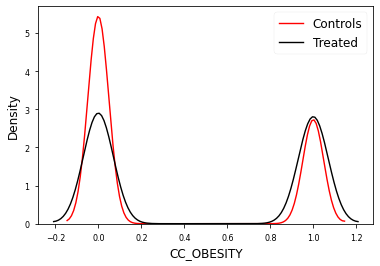

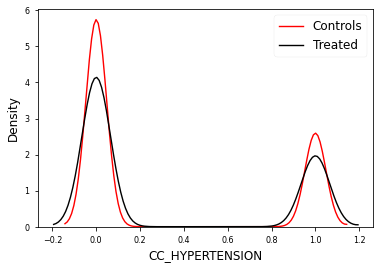

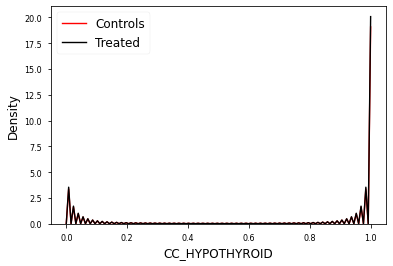

In [5]:
for col_name in columns_to_match:
    fig, ax  = plt.subplots()
    ax = sns.distplot(controls[col_name], hist=False, axlabel = "Age",  ax = ax, label = 'Controls', hist_kws = {'color':'r'}, kde_kws = {'color':'r'})
    ax = sns.distplot(treated[col_name], hist=False, axlabel = "Age", ax = ax, label = 'Treated', hist_kws = {'color':'k'},  kde_kws = {'color':'k'})
    ax.set_xlabel(col_name, fontsize=12)
    ax.legend(fontsize = 12)
    ax.set_ylabel("Density", fontsize=12)
    plt.show()